# Засоиб підготовки та аналізу даних
# Лабораторна робота №6

In [1176]:
import numpy as np
import matplotlib.pyplot as plt

## Завдання 1
1. Згенеруйте двовимірні дані (x, y) за допомогою numpy.random : бажано, щоб розподіл
точок був навколо деякої наперед заданої прямої (y = kx + b) для подальшого аналізу
результатів.
2. Напишіть функцію, яка реалізує метод найменших квадратів для пошуку оптимальних
оцінок k^ та b^.
3. Порівняйте знайдені параметри з оцінкою np.polyfit(x,y,1) (оцінка полінома
степеню 1 методом найменших квадратів), та з початковими параметрами прямої (якщо
такі є).
4. Відобразіть на графіку знайдені оцінки лінії регресії (вашої та numpy). Якщо ви
генерували вхідні дані навколо лінії, відобразіть також її.

In [1177]:
#1

k = 12
b = 7
n = 500

# x = np.random.randn(n)
x = np.linspace(0, 10, n)

y = k * x + b + np.random.normal(0, 5, n)

# print("x:", x)
# print("y:", y)

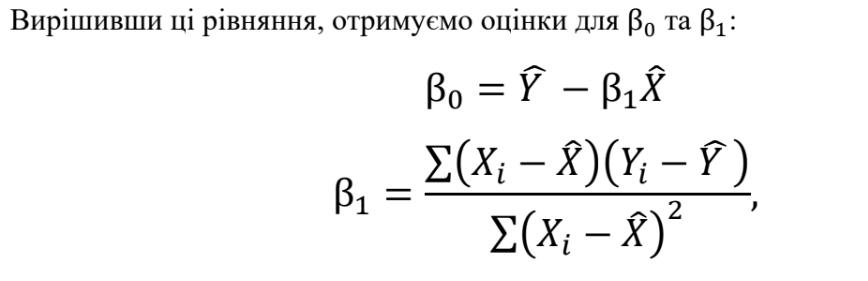

In [1178]:
#2
def sq(x, y):
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    sum1 = 0
    for i, j in zip(x, y):
        sum1 += (i-mean_x)*(j-mean_y)
        
    sum2 = 0
    for i in x:
        sum2 += (i-mean_x)**2

    b1 = sum1/sum2
    b0 = mean_y - mean_x*b1

    return b1, b0

b1, b0 = sq(x, y)
print(b1)
print(b0)

11.990390812120042
6.9707856339000145


In [1179]:
#3

# ну схожі ж
args = np.polyfit(x,y,1)
print(args)

[11.99039081  6.97078563]


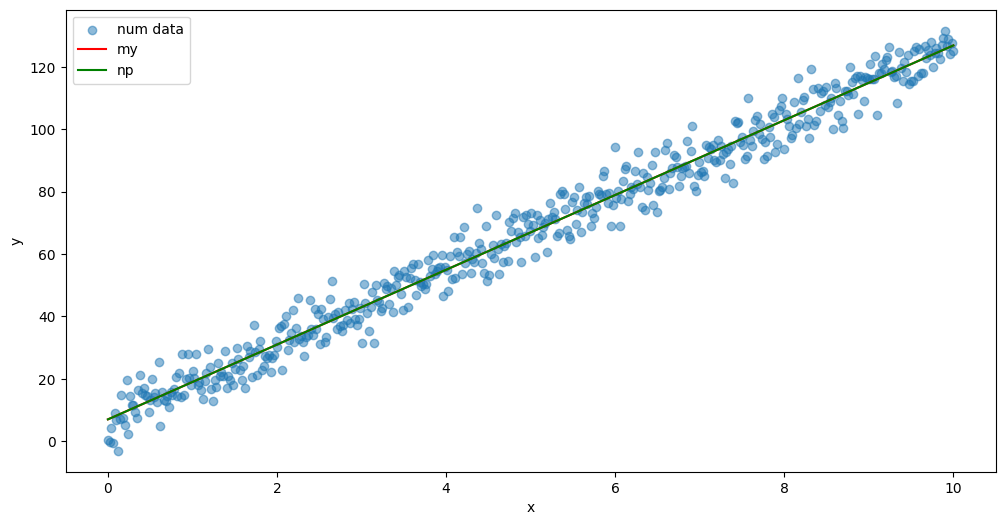

In [1180]:
#4
plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.5, label='num data')

plt.plot(x, b1*x + b0, color='red', label='my')
plt.plot(x, args[0]*x+args[1], color='green', label='np')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

## Завдання 2
1. Напишіть функцію, яка реалізує метод градієнтного спуску для пошуку оптимальних
оцінок k^ та b^. Визначіть оптимальні вхідні параметри: learning_rate, n_iter
2. Додайте отриману лінію регресії на загальний графік
3. Побудуйте графік похибки від кількості ітерацій, зробіть висновки
4. Порівняйте отримані результати з результатами попереднього завдання

In [1181]:
#1

def gradient_descent(x, y, learning_rate = 0.01, n_iter = 500):
    k = 0 # b1
    b = 0 # b0
    m = len(x)
    
    for i in range(n_iter):

        y_pred = k * x + b
        
        gradient_b = (-2/m) * sum(y - y_pred)
        gradient_k = (-2/m) * sum(x * (y - y_pred))
        
        b -= learning_rate * gradient_b
        k -= learning_rate * gradient_k
    
    return k, b

print(f"k = {k}, b = {b}")
gk, gb = gradient_descent(x, y,)
print(f"grad_k = {gk}, grad_b = {gb}")

# не розумію чому, але воно нормально працює лише коли запускаю всі клітинки одночасно

k = 12, b = 7
grad_k = 12.055592304890878, grad_b = 6.538871000293529


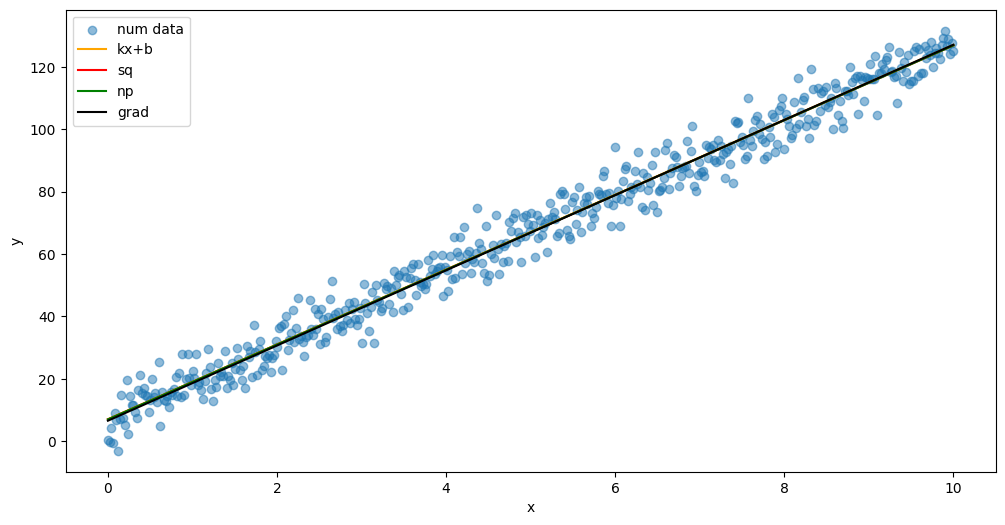

kx+b: 26.04639732693161
sq: 25.99961205102485
np: 25.999612051024858
grab: 26.04639732693161


In [1182]:
#2
def MSE (b0, b1):
    global n
    sum = 0
    for i, j in zip(x, y):
        sum += (j-b0-b1*i)**2
    
    return sum/n

plt.figure(figsize=(12,6))
plt.scatter(x, y, alpha=0.5, label='num data')


plt.plot(x, k*x + b, color='orange', label='kx+b')
plt.plot(x, b1*x + b0, color='red', label='sq')
plt.plot(x, args[0]*x+args[1], color='green', label='np')

k,b = gradient_descent(x,y)
plt.plot(x, gk*x+gb, color='black', label='grad')


plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

print(f"kx+b: {MSE(b, k)}")
print(f"sq: {MSE(b0, b1)}")
print(f"np: {MSE(args[1], args[0])}")
print(f"grab: {MSE(gb, gk)}")

MSE with k  &  b: 26.04639732693161
MSE with b1 & b0: 25.99961205102485


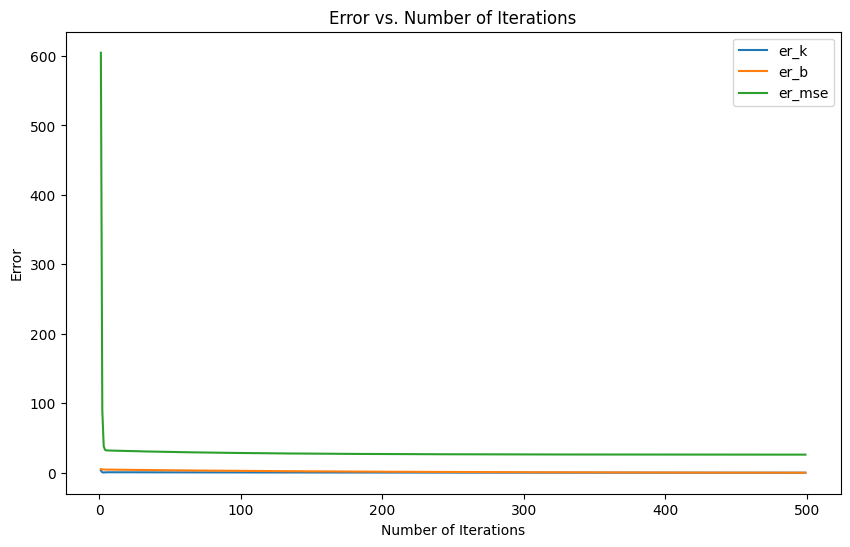

In [1183]:
#3

print(f"MSE with k  &  b: {MSE(b, k)}")
print(f"MSE with b1 & b0: {MSE(b0, b1)}")

iters = []
er_k = []
er_b = []
er_mse = []

for i in range(1, 500):
    rk, rb = gradient_descent(x, y, n_iter=i)

    iters.append(i)
    er_mse.append(MSE(rb, rk))
    # er_mse.append(MSE(b0, b1))
    er_k.append(abs(rk - k))
    er_b.append(abs(rb - b))

plt.figure(figsize=(10, 6))
plt.plot(iters, er_k, label='er_k')
plt.plot(iters, er_b, label='er_b')
plt.plot(iters, er_mse, label='er_mse')

plt.xlabel('Number of Iterations')
plt.ylabel('Error')
plt.title('Error vs. Number of Iterations')
plt.legend()
plt.show()